In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import json
import time

outputfilepath = os.path.join("Graph-Data")

In [163]:
covid_data = "../Group6-Project1/Repository/2020_US_Region_Mobility_Report.csv"
covid_df = pd.read_csv(covid_data)
covid_df.head()
covid_numbers = "../Group6-Project1/Repository/data-HdO5F.csv"
covid_numbers_df = pd.read_csv(covid_numbers)
new_covid_numbers_df = covid_numbers_df[["DATE_OF_INTEREST", "Cases"]]
new_covid_numbers_df = new_covid_numbers_df.rename(columns = {"DATE_OF_INTEREST" : "date"})
new_covid_numbers_df.head()
new_covid_numbers_df['date'] = pd.to_datetime(new_covid_numbers_df.date)
new_covid_numbers_df['date'] = new_covid_numbers_df['date'].astype(str)
new_covid_numbers_df.head()

,date,Cases
0,2020-02-29,1
1,2020-03-03,1
2,2020-03-04,5
3,2020-03-05,3
4,2020-03-06,8


<function matplotlib.pyplot.show(*args, **kw)>

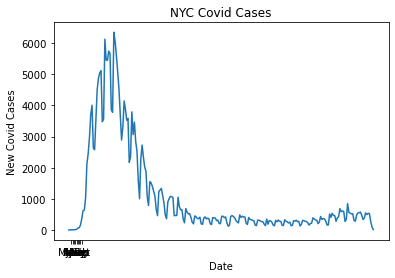

In [30]:
new_covid_numbers_df["month"] = pd.DatetimeIndex(new_covid_numbers_df['date']).month
values = new_covid_numbers_df['Cases']
x_axis = new_covid_numbers_df['date']
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10],labels=['Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'])
plt.plot(x_axis, values)
plt.title("NYC Covid Cases")
plt.xlabel("Date")
plt.ylabel("New Covid Cases")
plt.show

In [21]:
new_york_df = covid_df.loc[(covid_df["sub_region_1"] == 'New York')]
new_york_df.head()


new_york_df['date'] = pd.to_datetime(new_york_df.date)
new_york_df['date'] = new_york_df['date'].astype(str)
merge_data=pd.merge(new_york_df, new_covid_numbers_df, on='date')
merge_data.sample(50)



<ipython-input-21-76592889c045>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_df['date'] = pd.to_datetime(new_york_df.date)
<ipython-input-21-76592889c045>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_df['date'] = new_york_df['date'].astype(str)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Cases,month
11188,US,United States,New York,Chemung County,NaN,NaN,36015.0,2020-09-01,NaN,NaN,NaN,NaN,-28.0,4.0,296,9
3481,US,United States,New York,Chenango County,NaN,NaN,36017.0,2020-04-27,NaN,-8.0,NaN,NaN,-38.0,16.0,2289,4
1350,US,United States,New York,Seneca County,NaN,NaN,36099.0,2020-03-23,-56.0,-20.0,NaN,-52.0,-39.0,NaN,3570,3
8962,US,United States,New York,Ontario County,NaN,NaN,36069.0,2020-07-24,-10.0,0.0,NaN,27.0,-34.0,8.0,299,7
3130,US,United States,New York,New York County,NaN,NaN,36061.0,2020-04-21,-87.0,-53.0,-69.0,-81.0,-77.0,32.0,3064,4
4290,US,United States,New York,Cortland County,NaN,NaN,36023.0,2020-05-10,-27.0,17.0,NaN,NaN,-18.0,NaN,458,5
2381,US,United States,New York,Livingston County,NaN,NaN,36051.0,2020-04-09,-44.0,15.0,NaN,-22.0,-51.0,22.0,5071,4
10923,US,United States,New York,Rensselaer County,NaN,NaN,36083.0,2020-08-26,-5.0,NaN,NaN,NaN,-41.0,9.0,313,8
5021,US,United States,New York,Yates County,NaN,NaN,36123.0,2020-05-21,NaN,27.0,NaN,NaN,-30.0,NaN,1069,5
4553,US,United States,New York,Monroe County,NaN,NaN,36055.0,2020-05-14,-44.0,-8.0,57.0,-36.0,-50.0,20.0,1112,5


In [22]:
#merge_data=pd.DataFrame({'sub_region_2':["New York County", "Bronx County", "Kings County", "Richmond County", "Queens County"]})
#merge_data   
merge_data = merge_data.loc[(merge_data["sub_region_2"] == "New York County") | (merge_data["sub_region_2"] == "Bronx County") | (merge_data["sub_region_2"] == "Richmond County") | (merge_data["sub_region_2"] == "Queens County") | (merge_data["sub_region_2"] == "Kings County"), :]
merge_data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Cases,month
3,US,United States,New York,Bronx County,NaN,NaN,36005.0,2020-02-29,10.0,-1.0,-15.0,8.0,4.0,-1.0,1,2
23,US,United States,New York,Kings County,NaN,NaN,36047.0,2020-02-29,6.0,3.0,-5.0,3.0,6.0,-1.0,1,2
30,US,United States,New York,New York County,NaN,NaN,36061.0,2020-02-29,1.0,2.0,-2.0,-1.0,6.0,0.0,1,2
40,US,United States,New York,Queens County,NaN,NaN,36081.0,2020-02-29,4.0,1.0,0.0,-1.0,5.0,0.0,1,2
42,US,United States,New York,Richmond County,NaN,NaN,36085.0,2020-02-29,4.0,4.0,-8.0,-3.0,7.0,-1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,US,United States,New York,Bronx County,NaN,NaN,36005.0,2020-10-23,-21.0,-3.0,-21.0,-29.0,-34.0,11.0,273,10
14331,US,United States,New York,Kings County,NaN,NaN,36047.0,2020-10-23,-28.0,-4.0,21.0,-38.0,-41.0,13.0,273,10
14338,US,United States,New York,New York County,NaN,NaN,36061.0,2020-10-23,-56.0,-23.0,-35.0,-54.0,-55.0,17.0,273,10
14348,US,United States,New York,Queens County,NaN,NaN,36081.0,2020-10-23,-25.0,0.0,42.0,-44.0,-37.0,13.0,273,10


In [130]:
New_df = merge_data[['sub_region_1','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline','Cases','month']].copy()
New_df = New_df.rename(columns = {'sub_region_1':'State', 'date':'Date', 'retail_and_recreation_percent_change_from_baseline':'Retail Change %', 'grocery_and_pharmacy_percent_change_from_baseline':'Grocery & Pharmacy %', 'parks_percent_change_from_baseline':'Parks Change %','transit_stations_percent_change_from_baseline':'Transit Stations Change %', 'workplaces_percent_change_from_baseline':'Workplace Change %','residential_percent_change_from_baseline':'Residental Change %', 'month':'Month'}, inplace = False)

month_ave = New_df.groupby('Month').mean().reset_index()
month_ave

,Month,Retail Change %,Grocery & Pharmacy %,Parks Change %,Transit Stations Change %,Workplace Change %,Residental Change %,Cases
0,2,5.000000,1.800000,-6.000000,1.200000,5.600000,-0.600000,1.000000
1,3,-28.744828,-3.600000,-5.151724,-34.303448,-29.089655,13.227586,2248.379310
2,4,-66.793333,-27.706667,-32.633333,-67.020000,-63.433333,26.986667,3644.733333
3,5,-55.574194,-17.322581,12.800000,-58.400000,-52.374194,21.148387,918.064516
4,6,-42.960000,-10.373333,44.466667,-48.893333,-43.860000,16.146667,362.566667
5,7,-32.683871,-9.580645,46.387097,-44.296774,-42.845161,12.967742,316.483871
6,8,-30.954839,-11.477419,46.220000,-42.006452,-39.922581,10.890323,239.258065
7,9,-27.753333,-9.300000,34.047619,-40.306667,-38.673333,10.660000,344.266667
8,10,-30.391304,-9.147826,8.973913,-38.826087,-35.956522,11.217391,482.695652


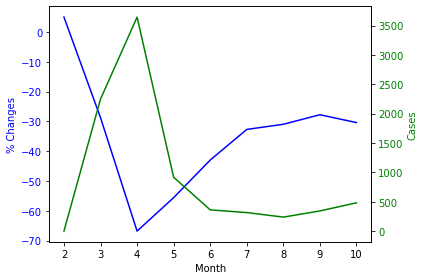

<Figure size 432x288 with 0 Axes>

In [154]:
x = month_ave['Month']
y = month_ave['Retail Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

plt.savefig(os.path.join(outputfilepath, "Retail Change % vs Cases"))

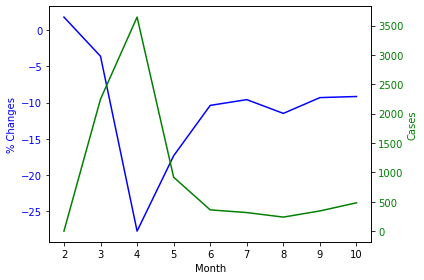

<Figure size 432x288 with 0 Axes>

In [155]:
x = month_ave['Month']
y = month_ave['Grocery & Pharmacy %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

plt.savefig(os.path.join(outputfilepath, "Grocery & Pharmacy Change  vs Cases"))

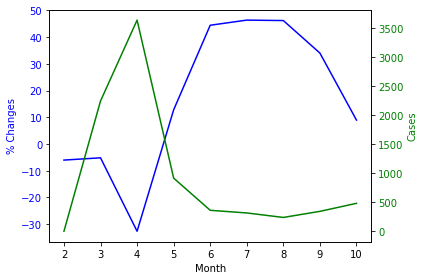

<Figure size 432x288 with 0 Axes>

In [156]:
x = month_ave['Month']
y = month_ave['Parks Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

plt.savefig(os.path.join(outputfilepath, "Parks Change % vs Cases"))

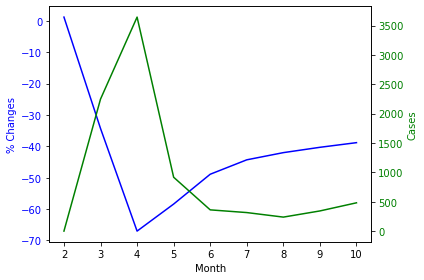

<Figure size 432x288 with 0 Axes>

In [157]:
x = month_ave['Month']
y = month_ave['Transit Stations Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
plt.savefig(os.path.join(outputfilepath, "Transit Stations Change % vs Cases"))

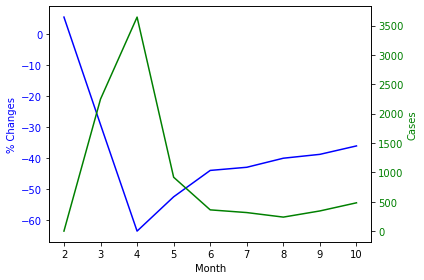

<Figure size 432x288 with 0 Axes>

In [158]:
x = month_ave['Month']
y = month_ave['Workplace Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
plt.savefig(os.path.join(outputfilepath, "Workplace Change % vs Cases"))

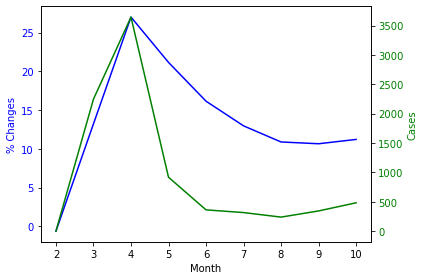

<Figure size 432x288 with 0 Axes>

In [159]:
x = month_ave['Month']
y = month_ave['Residental Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
plt.savefig(os.path.join(outputfilepath, "Residental Change % vs Cases"))